<a href="https://colab.research.google.com/github/Kensuzuki95/CE888/blob/main/Lab-8/transfer_learning_FE_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task:
In your Lab_8 folder, we have stored data under <data.zip> file. This is an image dataset with 4 classes (i.e. cats, dogs, humans, horses). Please implement both Feature Extractor and Fine-Tuning methods on data.zip. Please ignore use VG166 and you are free to use any other pre-trained models https://keras.io/api/applications/

# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/CE888 Data Science for Decision Making/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import os
# Get all the paths
data_dir_list = os.listdir('/content/data')
#print(data_dir_list cats)
path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print(file_count)
#print(data_dir_list dogs)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print(file_count)
#print(data_dir_list horses)
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print(file_count)
#print(data_dir_list Humans)
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print(file_count)

202
202
202
202


## Make New Directory

In [5]:
base_dir = '/content/animal_data'
os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [13]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/cats', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/cats', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/cats', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/dogs', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/dogs', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/dogs', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/horses', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/horses', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/horses', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(1, 101)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(101, 152)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(152, 203)]
for fname in fnames:
    src = os.path.join('/content/data/Humans', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

# Labeling the Data

In [50]:
def label_img(img):
    if 'dog' in img: return 0
    elif 'cat' in img: return 1
    elif 'horse' in img: return 2
    elif 'rider' in img: return 3

# Creating Training / Validation/ Test Datasets

In [52]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [53]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(400, 224, 224, 3)
(204, 224, 224, 3)
(204, 224, 224, 3)


# Create Model using NASNetLarge

In [54]:
## Import NASNetLarge [One of the highest performing model in image recognition]
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [55]:
model = NASNetLarge(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    #classifier_activation="softmax"
    )
model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 96) 2592        input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_520 (Activation)     (None, 111, 111, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [68]:
last_layer = model.get_layer('global_average_pooling2d_2').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 4 classes [dog, cat, horse, human]
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 96) 2592        input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_520 (Activation)     (None, 111, 111, 96) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

In [69]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

# Train and Test the model

In [71]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 43s 616ms/step - loss: 3.5625 - acc: 0.4510 - val_loss: 1.9448 - val_acc: 0.5539
Epoch 2/10
40/40 [==============================] - 18s 460ms/step - loss: 1.3030 - acc: 0.6858 - val_loss: 1.6907 - val_acc: 0.5490
Epoch 3/10
40/40 [==============================] - 18s 462ms/step - loss: 1.3900 - acc: 0.6624 - val_loss: 2.3252 - val_acc: 0.5588
Epoch 4/10
40/40 [==============================] - 18s 463ms/step - loss: 1.3970 - acc: 0.6731 - val_loss: 2.1115 - val_acc: 0.5980
Epoch 5/10
40/40 [==============================] - 18s 464ms/step - loss: 1.6675 - acc: 0.7384 - val_loss: 1.4644 - val_acc: 0.5980
Epoch 6/10
40/40 [==============================] - 19s 465ms/step - loss: 0.7883 - acc: 0.7323 - val_loss: 2.1642 - val_acc: 0.5588
Epoch 7/10
40/40 [==============================] - 18s 464ms/step - loss: 1.2343 - acc: 0.6477 - val_loss: 2.0240 - val_acc: 0.6275
Epoch 8/10
40/40 [==============================] - 18s 465ms/step - 

## Visualize the results produced by the model

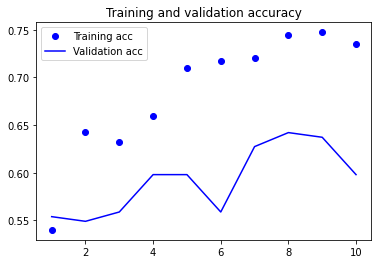

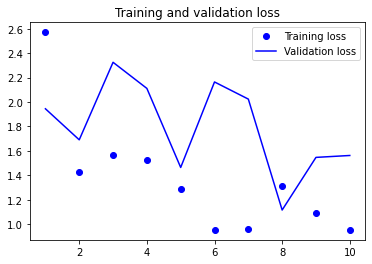

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [80]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5

# Modify the data shape
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
mod_test_y = enc.fit_transform(test_y.reshape(-1, 1))
test_acc = accuracy_score(mod_test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(mod_test_y, ypred)

#auc = roc_auc_score(mod_test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
#print("AUC:\t\t", auc)

Train Accuracy:	 0.7350000143051147
Val Accuracy:	 0.5980392098426819
Test Accuracy:	 0.5686274509803921
Precision:	 [1.         0.375      0.8974359  0.72727273]
Recall:		 [0.1372549  0.82352941 0.68627451 0.62745098]
F1 Score:	 [0.24137931 0.51533742 0.77777778 0.67368421]
